<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/metodo_de_colocaci%C3%B3n_(clase).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodo de colocación


In [58]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Resolviendo de manera analitica

In [59]:
x = sp.symbols('x')
u = sp.Function('u')


In [60]:
ode = u(x).diff(x,x)+u(x)+x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [61]:
sol = sp.dsolve(ode, ics={u(0):0 , u(1):0})

In [62]:
sol


Eq(u(x), -x + sin(x)/sin(1))

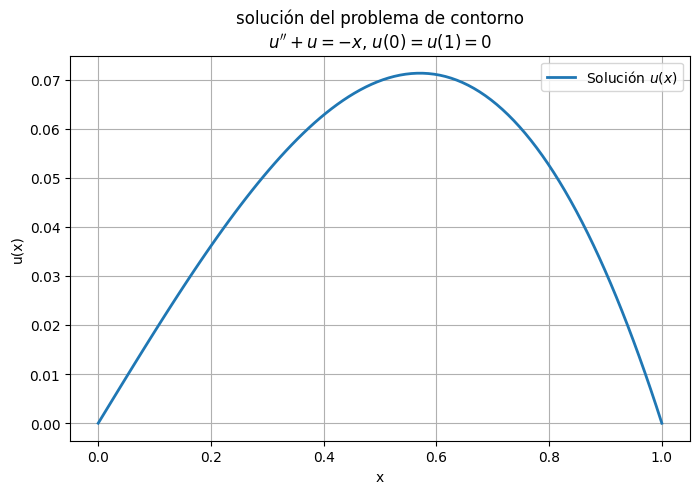

In [63]:
#convertimos en un arreglo
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr, "numpy")


xx= np.linspace(0,1,100)
yy= u_num(xx)


plt.figure(figsize=(8,5))
plt.plot(xx,yy, label = "Solución $u(x)$", linewidth=2)
plt.title("solución del problema de contorno\n$u'' + u=-x $, $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

## Solución numerica

Resolviendo utilizando funciones de prueba

In [64]:
a, b= sp.symbols('a b')

#definimos la función de prueba u_n(x) que cumple u(0)=u(1)=0

u_n= a*x*(1-x) + b*x**2*(1-x)
u_n

a*x*(1 - x) + b*x**2*(1 - x)

definimos el residuo o error E

In [65]:
u_n_2 =sp.diff(u_n, x, 2)

F = u_n_2 + u_n
F

a*x*(1 - x) + b*x**2*(1 - x) - 2*(a + 2*b*x + b*(x - 1))

In [66]:
#puntos de colocación
points =[sp.Rational(1,4), sp.Rational(1,2)]

points

[1/4, 1/2]

In [67]:
eqs = [sp.Eq(F.subs(x,p), -p) for p in points ]

#Resolver el sistema de ecuaciones para encontrar a y b

sol_1=sp.solve(eqs, [a,b])
sol_1


{a: 6/31, b: 40/217}

In [68]:
for eq in eqs:
  print(eq)

Eq(-29*a/16 + 35*b/64, -1/4)
Eq(-7*a/4 - 7*b/8, -1/2)


In [72]:
print("Sistema de  ecuaciones simbolico:")
for eq in eqs:
  sp.pprint(eq)

Sistema de  ecuaciones simbolico:
  29⋅a   35⋅b       
- ──── + ──── = -1/4
   16     64        
  7⋅a   7⋅b       
- ─── - ─── = -1/2
   4     8        


In [70]:
#Sustituir en la función de prueba

u_approx = u_n.subs (sol_1)
u_approx

40*x**2*(1 - x)/217 + 6*x*(1 - x)/31

In [73]:
u_approx_fn =sp.lambdify (x, u_approx, "numpy")

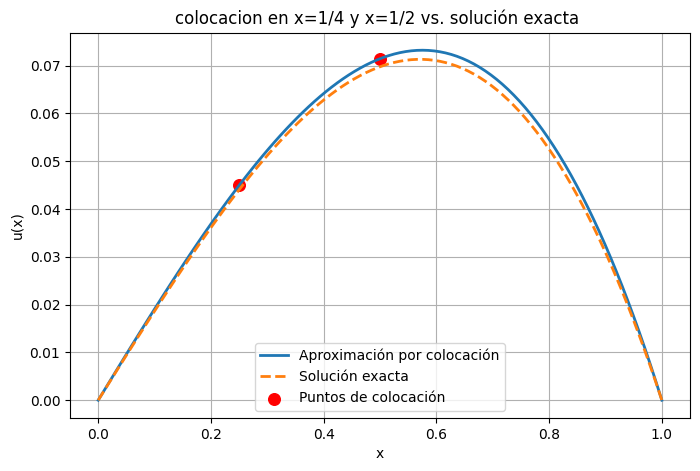

In [75]:
#solución analitica y numerica
xx= np.linspace (0,1,100)
plt.figure(figsize=(8,5))
plt.plot(xx,u_approx_fn(xx), label = "Aproximación por colocación", linewidth=2)
plt.plot(xx, yy,"--", label = "Solución exacta", linewidth=2)

#puntos de colocación
plt.scatter ([0.25,0.5], u_approx_fn(np.array([0.25,0.5])),
             color="red", s=70, label="Puntos de colocación")

plt.title("solución del problema de contorno\n$u'' + u=-x $, $u(0)=u(1)=0$")


plt.title("colocacion en x=1/4 y x=1/2 vs. solución exacta ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()